In [2]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('SalaryData_Train.csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


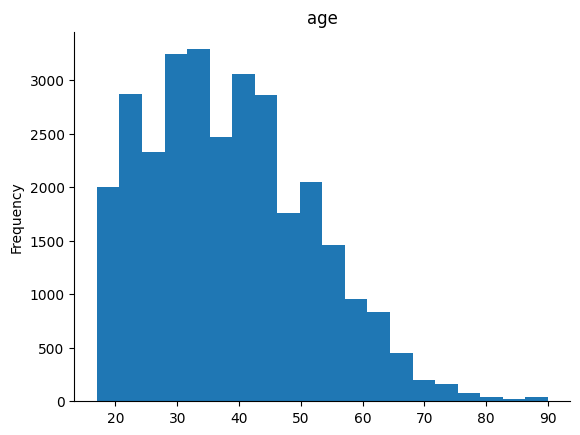

In [5]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

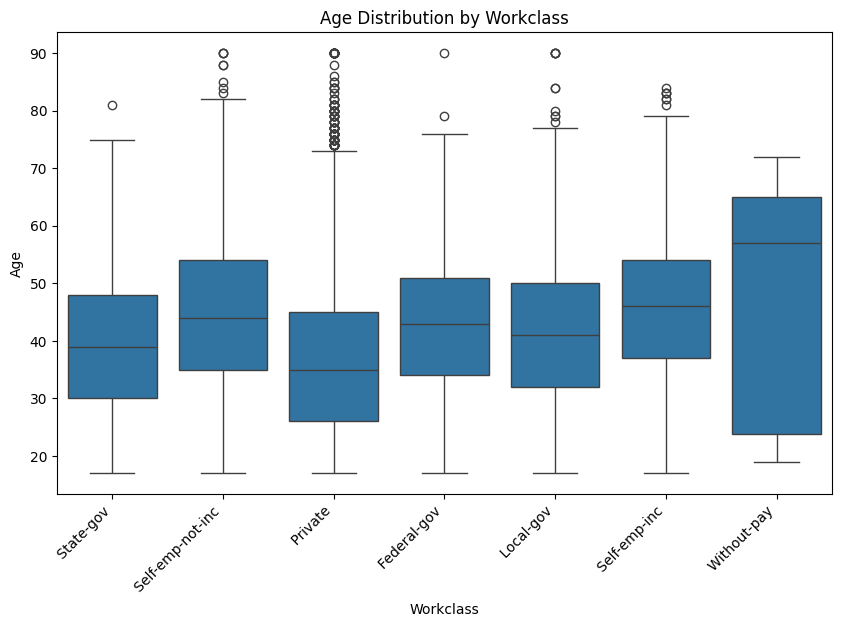

In [6]:
# @title Age Distribution by Workclass

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='workclass', y='age', data=df)
plt.title('Age Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Age')
_ = plt.xticks(rotation=45, ha='right')

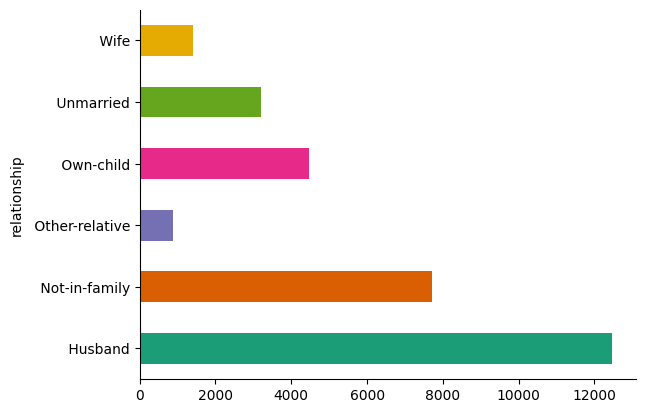

In [7]:
# @title relationship

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('relationship').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

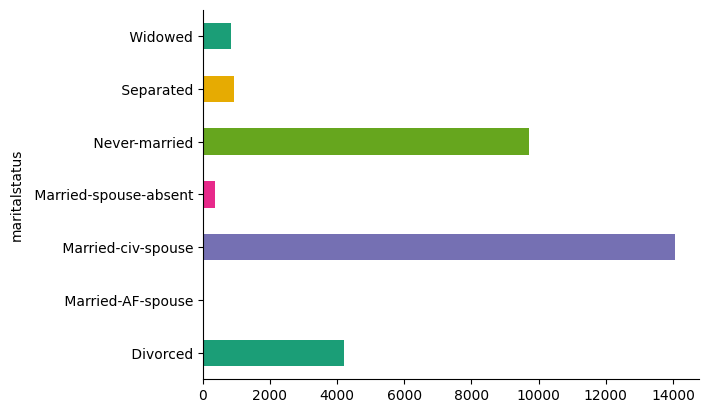

In [8]:
# @title maritalstatus

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('maritalstatus').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

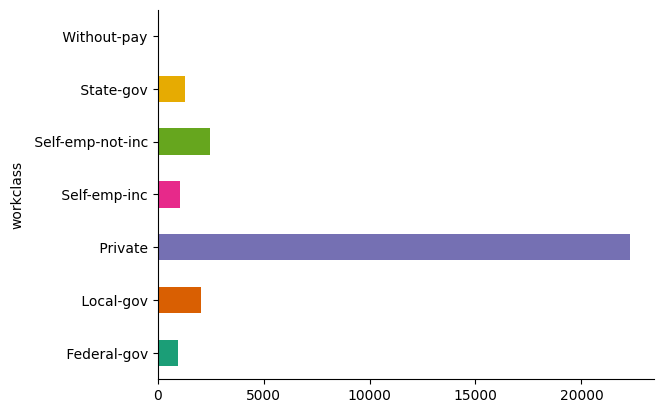

In [9]:
# @title workclass

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('workclass').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [28]:
x = df.drop('Salary',axis=1)
y = df['Salary']

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
for column in df.select_dtypes(include='object').columns:
  df[column] = le.fit_transform(df[column])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [36]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.7741627984084881
Test Accuracy: 0.7679429802751533


In [52]:
training_accuracy = []
test_accuracy = []


for i in range(0,10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  model.fit(x_train, y_train)
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)
  training_accuracy.append(accuracy_score(y_train, y_pred_train))
  test_accuracy.append(accuracy_score(y_test, y_pred_test))

In [53]:
k1 = pd.DataFrame(training_accuracy)
k2 = pd.DataFrame(test_accuracy)

In [54]:
print('Cross Validation Training Accuracy:',k1.mean().round(2))
print('Cross Validation Test Accuracy:', k2.mean().round(2))

Cross Validation Training Accuracy: 0    0.77
dtype: float64
Cross Validation Test Accuracy: 0    0.77
dtype: float64
